<a href="https://colab.research.google.com/github/MakonorDaniel/Facebook_Post_Data-_Analysis/blob/main/Facebook_Post_Data__Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

fb = pd.read_json('/content/your_posts_1.json')

fb.head()

,timestamp,data,title,attachments,tags
0,2009-08-20 16:41:54,[{'post': 'memory always tks u bkward bt immag...,Makonor Daniel updated his status.,NaN,NaN
1,2009-08-27 16:34:49,[{'post': 'man startd makin choices immediatly...,Makonor Daniel updated his status.,NaN,NaN
2,2009-09-24 13:01:43,[{'post': '1 moment of revelatn is g8ter dan s...,Makonor Daniel updated his status.,NaN,NaN
3,2009-10-07 15:45:12,"[{'post': 'we make a living by what we get,but...",Makonor Daniel updated his status.,NaN,NaN
4,2009-10-31 18:33:05,[{'post': '100% leader ws awesm'}],Makonor Daniel updated his status.,NaN,NaN


In [2]:
#drop some unnecessary columns
fb = fb.drop(['attachments', 'title'], axis=1)

# rename the timestamp column
fb.rename(columns={'timestamp': 'date'}, inplace=True)

# covert date to appropriate datetime format
pd.to_datetime(fb['date'])

fb.head()

,date,data,tags
0,2009-08-20 16:41:54,[{'post': 'memory always tks u bkward bt immag...,NaN
1,2009-08-27 16:34:49,[{'post': 'man startd makin choices immediatly...,NaN
2,2009-09-24 13:01:43,[{'post': '1 moment of revelatn is g8ter dan s...,NaN
3,2009-10-07 15:45:12,"[{'post': 'we make a living by what we get,but...",NaN
4,2009-10-31 18:33:05,[{'post': '100% leader ws awesm'}],NaN


In [3]:
fb = fb.set_index('date')
fb.head()

,data,tags
date,,
2009-08-20 16:41:54,[{'post': 'memory always tks u bkward bt immag...,NaN
2009-08-27 16:34:49,[{'post': 'man startd makin choices immediatly...,NaN
2009-09-24 13:01:43,[{'post': '1 moment of revelatn is g8ter dan s...,NaN
2009-10-07 15:45:12,"[{'post': 'we make a living by what we get,but...",NaN
2009-10-31 18:33:05,[{'post': '100% leader ws awesm'}],NaN


In [13]:
post_counts = fb['data'].resample('M').size()
post_counts

date
2009-08-31    2
2009-09-30    1
2009-10-31    3
2009-11-30    0
2009-12-31    0
             ..
2021-04-30    2
2021-05-31    0
2021-06-30    0
2021-07-31    2
2021-08-31    1
Freq: M, Name: data, Length: 145, dtype: int64

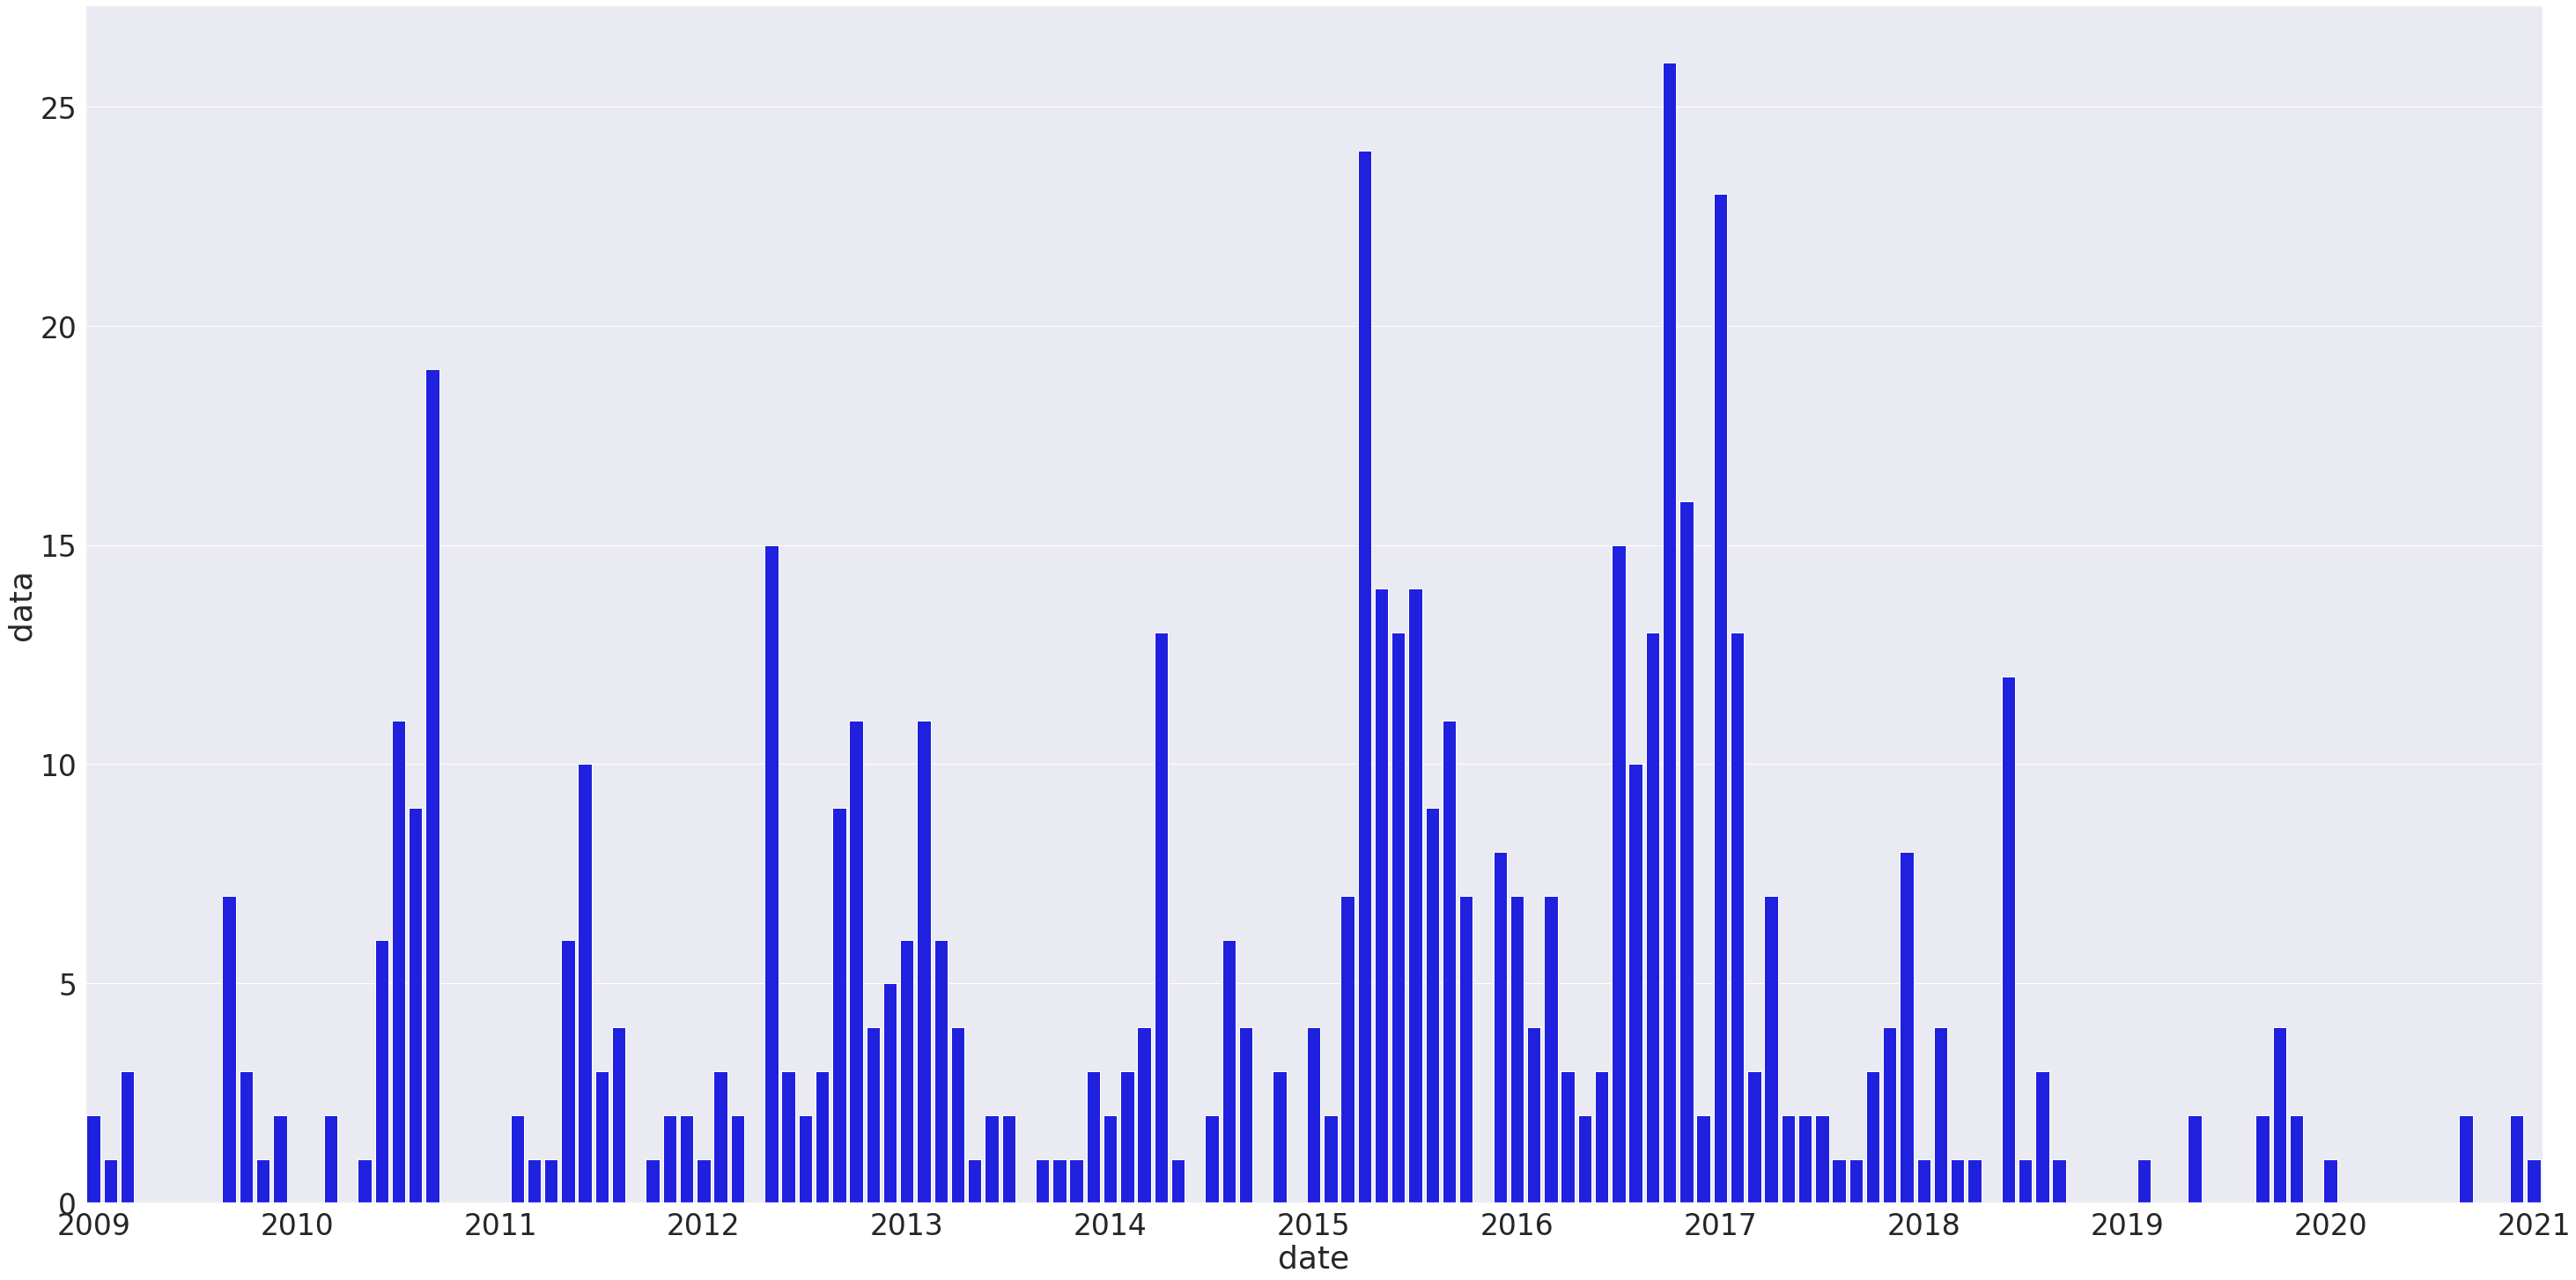

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# set figure size and font size
sns.set(rc={'figure.figsize':(50,25)})
sns.set(font_scale=3)

# set x labels
x_labels = post_counts.index

#create bar plot
sns.barplot(x_labels, post_counts, color="blue")

# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(0, len(x_labels), step=12)

#reformat date to display year only plt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

# display the plot
plt.show()